In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from functs import functs


In [268]:
raw = pd.read_csv("../../bullshit_data/MCSFT_net.txt")

raw

,Date,Net_value(Millions of US $)
0,2022-06-30,16.740
1,2022-03-31,16.728
2,2021-12-31,18.765
3,2021-09-30,20.505
4,2021-06-30,16.458
5,2021-03-31,15.457
6,2020-12-31,15.463
7,2020-09-30,13.893
8,2020-06-30,11.202
9,2020-03-31,10.752


In [269]:
raw['Date'] = pd.to_datetime(raw['Date'])
raw = raw.set_index('Date')
raw.columns = ['net_value']

In [237]:
raw

,net_value
Date,
2022-06-30,16.740
2022-03-31,16.728
2021-12-31,18.765
2021-09-30,20.505
2021-06-30,16.458
2021-03-31,15.457
2020-12-31,15.463
2020-09-30,13.893
2020-06-30,11.202


In [146]:

print('--------------------------------------------------------')
print('Data Info')
print('--------------------------------------------------------')
print(raw.info())
print()
print()

print('--------------------------------------------------------')
print('Data Description')
print('--------------------------------------------------------')
print(raw.describe().T)
print()
print()

--------------------------------------------------------
Data Info
--------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54 entries, 2022-06-30 to 2009-03-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   net_value  54 non-null     float64
dtypes: float64(1)
memory usage: 864.0 bytes
None


--------------------------------------------------------
Data Description
--------------------------------------------------------
           count      mean       std    min   25%    50%      75%     max
net_value   54.0  7.429056  5.074797 -6.302  4.97  6.161  8.86075  20.505




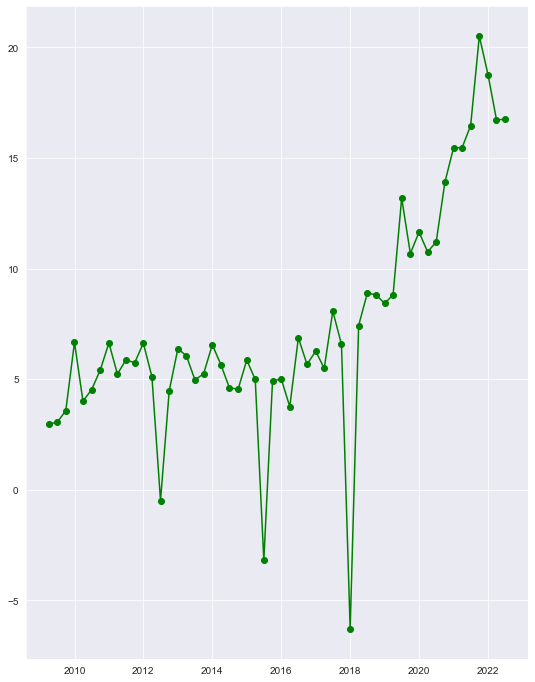

In [147]:
figure = plt.figure(figsize=(9, 12))
plt.plot(raw, '-o', c='g')
plt.show()

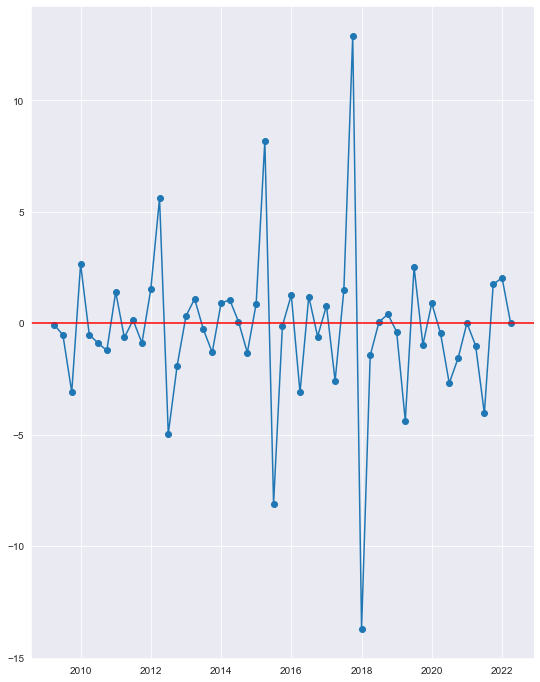

In [9]:
data = raw.diff(1).dropna()
figure = plt.figure(figsize=(9, 12))
_ = plt.plot(data, '-o')
_ = plt.axhline(y=0, c='r')

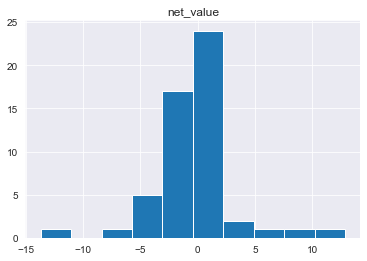

In [10]:
h = data.hist()

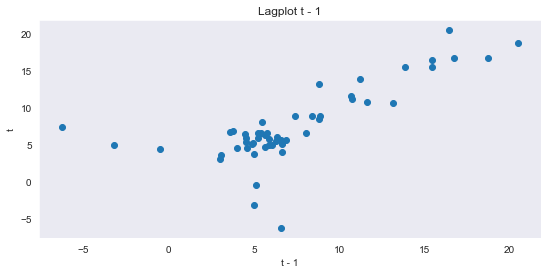

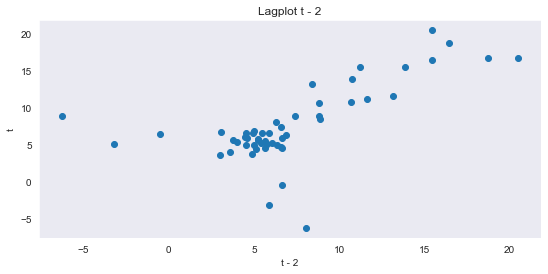

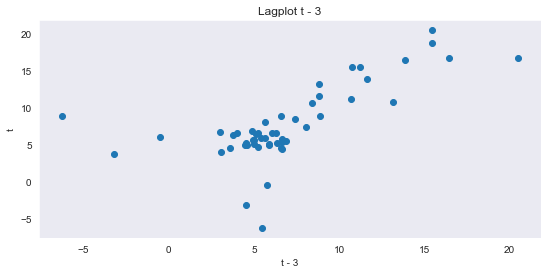

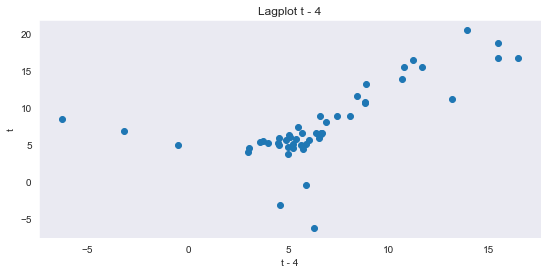

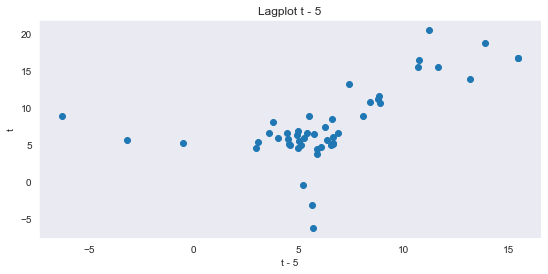

In [11]:
functs.lag_plot(raw, 5)

Badanie sezonowości
****

C:\Users\kmate\AppData\Local\Temp\ipykernel_13092\3236426055.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  s_1 = data.loc['2016-01-01':'2017-01-01']
C:\Users\kmate\AppData\Local\Temp\ipykernel_13092\3236426055.py:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  s_2 = data.loc['2017-01-01':'2018-01-01']
C:\Users\kmate\AppData\Local\Temp\ipykernel_13092\3236426055.py:6: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  s_3 = data.loc['2018-01-01':'2019-01-01']
C:\Users\kmate\AppData\Local\Temp\ipykernel_13092\3236426055.py:7: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and wil

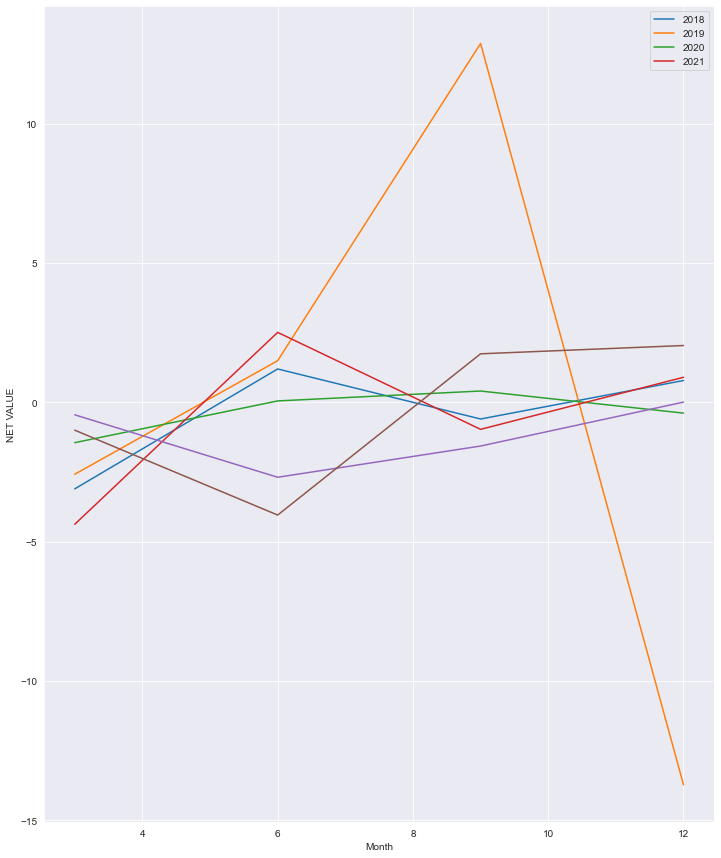

In [12]:
years = ['2018', '2019', '2020', '2021']

seasons = []
s_1 = data.loc['2016-01-01':'2017-01-01']
s_2 = data.loc['2017-01-01':'2018-01-01']
s_3 = data.loc['2018-01-01':'2019-01-01']
s_4 = data.loc['2019-01-01':'2020-01-01']
s_5 = data.loc['2020-01-01':'2021-01-01']
s_6 = data.loc['2021-01-01':'2021-12-31']
s_7 = data.loc['2022-01-01':]

seasons.append(s_1)
seasons.append(s_2)
seasons.append(s_3)
seasons.append(s_4)
seasons.append(s_5)
seasons.append(s_6)
seasons.append(s_7)

figure = plt.figure(figsize=(12, 15))
for season in seasons:
    plt.plot(season.index.month, season.net_value)
    plt.xlabel('Month')
    plt.ylabel('NET VALUE')
plt.legend([year for year in years])
plt.show()

Badanie stacjonarności szeregu
*****

In [13]:

print(sm.tsa.stattools.kpss(data))
print()
print(sm.tsa.stattools.adfuller(data))

(0.21923055505453953, 0.1, 20, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

(-6.6470311191469715, 5.234160409720593e-09, 2, 50, {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}, 218.4735918087809)


C:\Users\kmate\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Badanie autokorelacji
*****


Figure(432x288)


C:\Users\kmate\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


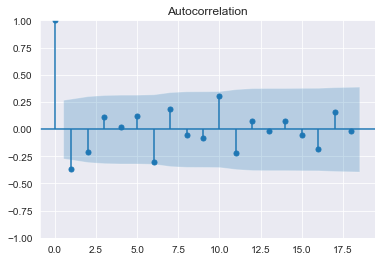

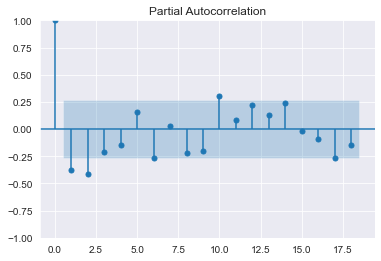

In [14]:

sm.graphics.tsa.plot_acf(data)
print()
print(sm.graphics.tsa.plot_pacf(data))

Model
*****

In [15]:
raw = raw.iloc[::-1]
raw = raw.loc['2016'::]

In [38]:
import pmdarima
auto = pmdarima.auto_arima(raw, information_criterion="aicc", stationary=True, max_d=2, m=4, seasonal = True, maxd=2, trace=True)
print(auto.summary())

Performing stepwise search to minimize aicc
 ARIMA(2,0,2)(1,0,1)[5] intercept   : AICC=inf, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[5] intercept   : AICC=104.081, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[5] intercept   : AICC=86.653, Time=0.03 sec
 ARIMA(0,0,1)(0,0,1)[5] intercept   : AICC=98.131, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[5]             : AICC=147.132, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[5] intercept   : AICC=83.352, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[5] intercept   : AICC=86.637, Time=0.03 sec
 ARIMA(1,0,0)(1,0,1)[5] intercept   : AICC=inf, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[5] intercept   : AICC=86.653, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[5] intercept   : AICC=86.646, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[5] intercept   : AICC=95.186, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[5] intercept   : AICC=inf, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[5]             : AICC=83.478, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[5] intercept
Total fit time: 0.622 seconds
                               SARIMAX Re

273.041


<Figure size 648x864 with 0 Axes>

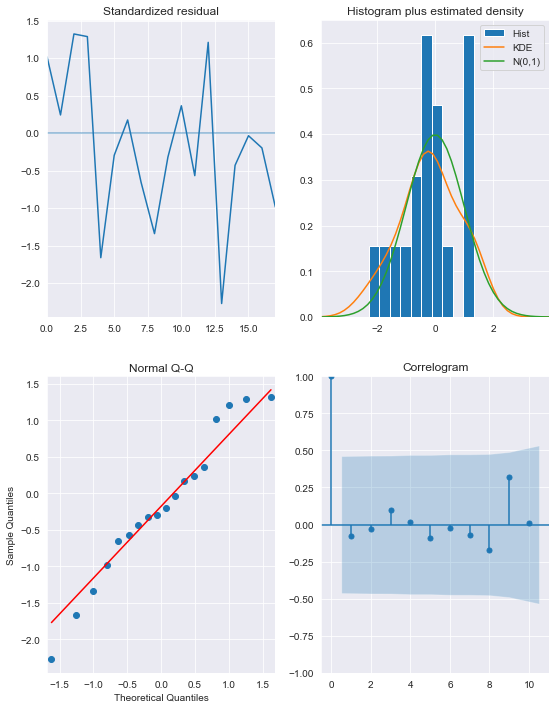

In [39]:
figure = plt.figure(figsize=(9, 12))
_ = auto.plot_diagnostics(figsize=(9,12))
plt.show()

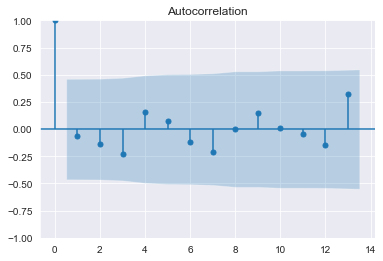

C:\Users\kmate\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 10 must be < 9.

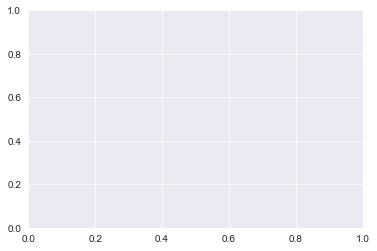

In [40]:
resid = auto.resid()
resid = pow(resid, 2)
sm.graphics.tsa.plot_acf(resid)
plt.show()
sm.graphics.tsa.plot_pacf(resid, lags=10)
plt.show()

print(resid)

Predictions
*****

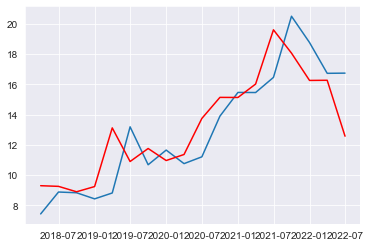

In [42]:
in_sample = auto.predict_in_sample(raw)
pred = in_sample
pred.columns = ['net_value']

real = plt.plot(raw, label='real')
pred_ = plt.plot(pred, label='prediction', c='r')
plt.show()


C:\Users\kmate\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


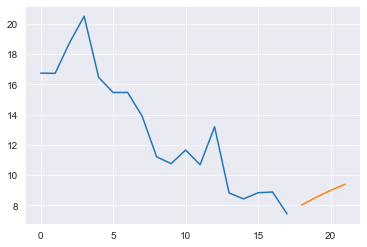

In [44]:
plt.show()
prediction_OS = auto.predict(n_periods=4)
v = plt.plot(raw.values, label='real')
b = plt.plot(prediction_OS, label='prediction')
plt.show()

----------------------------------------------
****

WSL
---------

In [270]:
raw = raw.iloc[::-1]
raw['intercept'] = 1
data = raw.diff(1)
df = data.dropna()

In [271]:
def auto_reg(data):
    data['Shifted_1'] = data['net_value'].shift()
    data['Shifted_2'] = data['net_value'].shift(periods=2)
    data_X = pd.DataFrame()

    data_X['Shift_1'] = data['Shifted_1']
    data_X['Shift_2'] = data['Shifted_2']
    data_X['Intercept'] = data['intercept']

    data = data.dropna()
    data_X = data_X.dropna()

    y = data['net_value'].values
    x = data_X.values


    X = sm.add_constant(x)
    model = sm.WLS(y, X).fit()


    return model

In [272]:
print(auto_reg(df).summary())


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.273
Model:                            WLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     9.018
Date:                Mon, 24 Oct 2022   Prob (F-statistic):           0.000473
Time:                        21:47:05   Log-Likelihood:                -129.59
No. Observations:                  51   AIC:                             265.2
Df Residuals:                      48   BIC:                             271.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5208      0.448      1.163      0.2

C:\Users\kmate\AppData\Local\Temp\ipykernel_13092\2969443423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Shifted_1'] = data['net_value'].shift()
C:\Users\kmate\AppData\Local\Temp\ipykernel_13092\2969443423.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Shifted_2'] = data['net_value'].shift(periods=2)
C:\Users\kmate\anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-

Autokorelacja reszt
*****

C:\Users\kmate\AppData\Local\Temp\ipykernel_13092\2969443423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Shifted_1'] = data['net_value'].shift()
C:\Users\kmate\AppData\Local\Temp\ipykernel_13092\2969443423.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Shifted_2'] = data['net_value'].shift(periods=2)


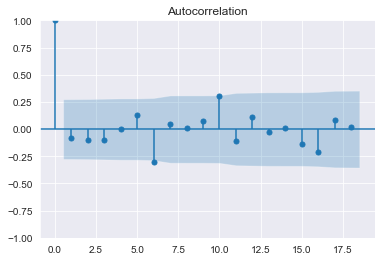

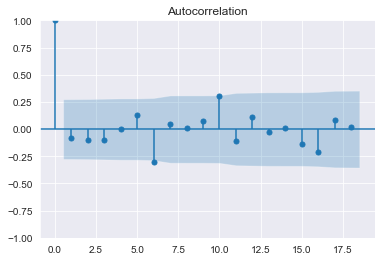

In [273]:
resid = auto_reg(df).resid
resid = pd.DataFrame(resid)

sm.graphics.tsa.plot_acf(resid)

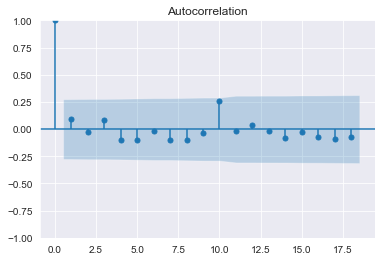

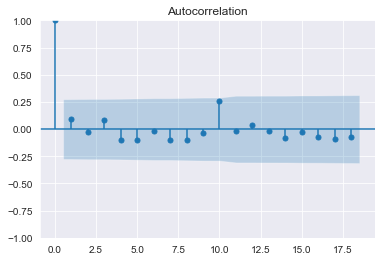

In [274]:
sm.graphics.tsa.plot_acf(pow(resid, 2))

Standaryzowane reszty
*****

In [275]:
from sklearn import preprocessing
resid = resid
scaler = preprocessing.StandardScaler().fit(resid)
standarized = scaler.transform(resid)

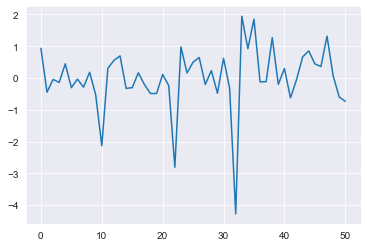

In [276]:
plt.plot(standarized)

Histogram reszt
*******

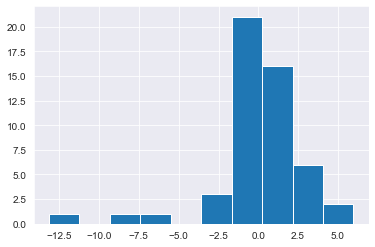

In [277]:
_ = plt.hist(resid)

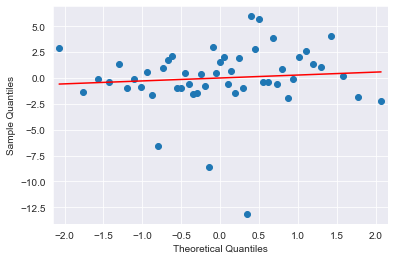

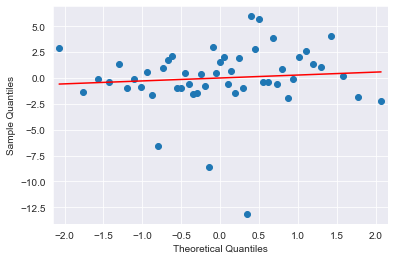

In [278]:
sm.qqplot(resid, line="r")

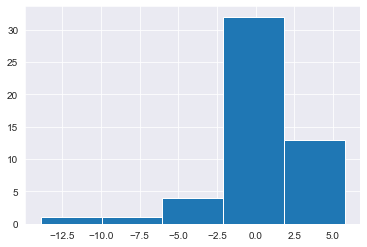

       Mean      Median    St. Dev.      Skew    Kurtosis    Durbin-Watson    JB-stat    JB-pvalue
-----------  ----------  ----------  --------  ----------  ---------------  ---------  -----------
1.21907e-16  -0.0484832     3.08573  -1.91187     10.5921          2.16317    126.148            0


In [260]:
functs.descriptive(resid)

In [261]:
df.size

212

In [262]:
pred = auto_reg(df).predict(df)
pred.size

C:\Users\kmate\AppData\Local\Temp\ipykernel_13092\2969443423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Shifted_1'] = data['net_value'].shift()
C:\Users\kmate\AppData\Local\Temp\ipykernel_13092\2969443423.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Shifted_2'] = data['net_value'].shift(periods=2)


53

C:\Users\kmate\AppData\Local\Temp\ipykernel_13092\2969443423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Shifted_1'] = data['net_value'].shift()
C:\Users\kmate\AppData\Local\Temp\ipykernel_13092\2969443423.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Shifted_2'] = data['net_value'].shift(periods=2)


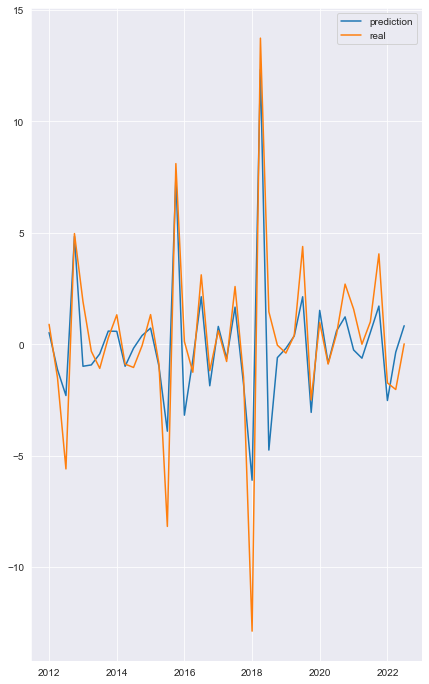

In [279]:

figure = plt.figure(figsize=(7, 12))
_ = plt.plot(auto_reg(df).predict(df)[10:], label='prediction')
_  = plt.plot(df['net_value'][10:], label='real')
plt.legend()